In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from IPython.display import clear_output
%matplotlib inline



In [3]:
patient = pd.read_csv("./moss_plos_one_data.csv")



In [4]:
yCounts = patient["y"].value_counts()
yCounts


False    2194077
True       23881
Name: y, dtype: int64

In [5]:
uniqueFalse = patient[patient["y"] == False].drop_duplicates(subset="id")
uniqueTrue = patient[patient["y"] == True].drop_duplicates(subset="id")


In [6]:
df = patient.copy()
df.loc[df["id"].isin(uniqueTrue.id),"y"]= True


In [7]:
dfTrue = df[df["y"] == True].drop_duplicates(subset = "id")
dfFalse = df[df["y"] == False].drop_duplicates(subset = "id")


In [8]:
newDf = pd.concat([dfTrue, dfFalse], axis=0)



In [9]:
newDf.y.value_counts()



False    7738
True      367
Name: y, dtype: int64

([<matplotlib.axis.XTick at 0x109322208>,
 <a list of 3 Text xticklabel objects>)

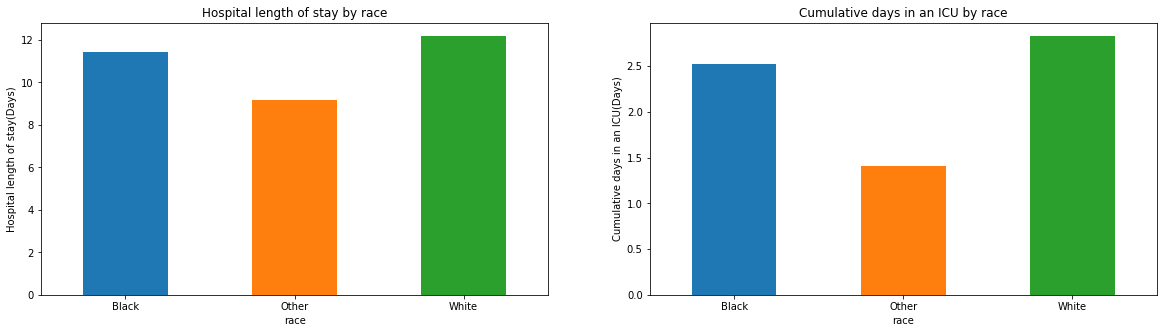

In [10]:
#Hospital Length of Stay by race
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(121)
patient.groupby("race")["LOS"].mean().plot("bar")
plt.title("Hospital length of stay by race")
plt.ylabel("Hospital length of stay(Days)")
plt.xticks(np.arange(3),["Black","Other","White"],rotation=0)
#cumulative days in an ICU during admission
ax2 = fig.add_subplot(122)
patient.groupby("race")["ICU_Pt_Days"].mean().plot("bar")
plt.title("Cumulative days in an ICU by race")
plt.ylabel("Cumulative days in an ICU(Days)")
plt.xticks(np.arange(3),["Black","Other","White"],rotation=0)



In [11]:
def ECG():
    userId = input("enter the patient id: ")
    data = patient[patient["id"] == int(userId)]
    n = len(data)
    interval = np.arange(0,15*n/60,15/60)
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(411)
    ax = plt.plot(interval,data.hr)
    plt.xticks(np.arange(0, 15*n/60,2))
    plt.xlabel("Hour",fontsize =16)
    plt.ylabel("Heart Rate",fontsize =16)
    plt.title("Mean Heart Rate for every 15 mins",fontsize =18)
    ax2 = fig.add_subplot(412)
    ax2 = plt.plot(interval,data["s2.hr"],color="red")
    plt.tight_layout(pad=1.8)
    plt.xticks(np.arange(0, 15*n/60,2))
    plt.xlabel("Hour",fontsize =16)
    plt.ylabel("Heart Rate",fontsize =16)
    plt.title("Slope of the mean heart rate over the preceding 2 hours",fontsize =18)
    ax2 = fig.add_subplot(413)
    ax2 = plt.plot(interval,data["s8.hr"],color="green")
    plt.tight_layout(pad=1.8)
    plt.xticks(np.arange(0, 15*n/60,2))
    plt.xlabel("Hour",fontsize =16)
    plt.ylabel("Heart Rate",fontsize =16)
    plt.title("Slope of the mean heart rate over the preceding 8 hours",fontsize =18)
    ax2 = fig.add_subplot(414)
    ax2 = plt.plot(interval,data["s24.hr"],color="orange")
    plt.tight_layout(pad=1.8)
    plt.xticks(np.arange(0, 15*n/60,2))
    plt.xlabel("Hour",fontsize =16)
    plt.ylabel("Heart Rate",fontsize =16)
    plt.title("Slope of the mean heart rate over the preceding 24 hours",fontsize =18)
        
        
        

In [ ]:
ECG()

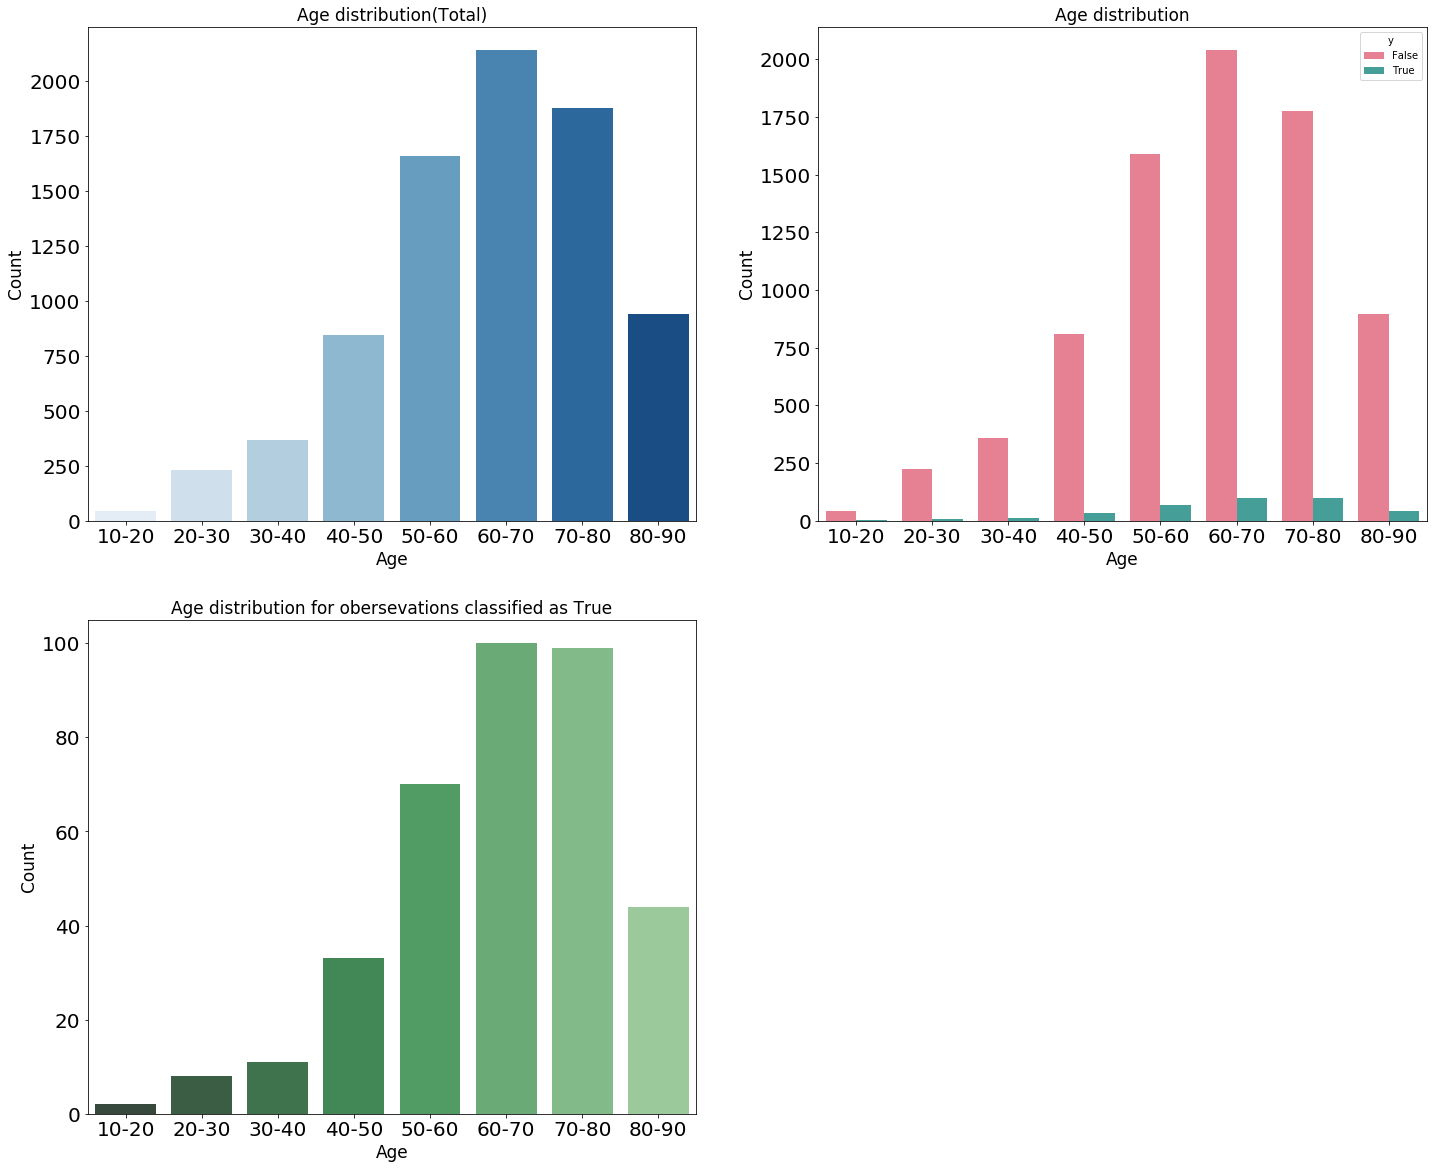

In [12]:
#age distribution
def ageRange(age):
    if 0 < age <= 10:
        return "0-10"
    if 10< age <= 20:
        return "10-20"
    if 20 < age <= 30:
        return "20-30"
    if 30 < age <= 40:
        return "30-40"
    if 40 < age <= 50:
        return "40-50"
    if 50 < age <= 60:
        return "50-60"
    if 60 < age <= 70:
        return "60-70"
    if 70 < age <= 80:
        return "70-80"
    if 80 < age <= 90:
        return "80-90"
patient_age = newDf[["age","y"]].copy()
patient_age.age = np.int_(patient_age.age)
patient_age.age = patient_age.age.apply(lambda x: ageRange(x))
patient_age = patient_age.sort_values("age")
fig = plt.figure(figsize = (24,20))
ax1 = fig.add_subplot(222)
ax1 = sns.countplot(x=patient_age.age, hue="y", data = patient_age,palette="husl")
plt.title("Age distribution", fontsize = 17)
plt.xlabel("Age",fontsize = 17), 
plt.ylabel("Count", fontsize = 17)
plt.tick_params(axis='both', which='major', labelsize=20)
ax2 = fig.add_subplot(221)
ax2 = sns.countplot(patient_age.age, data = patient_age,palette="Blues")
plt.title("Age distribution(Total)", fontsize = 17)
plt.xlabel("Age",fontsize = 17), 
plt.ylabel("Count", fontsize = 17)
plt.tick_params(axis='both', which='major', labelsize=20)
ax3 = fig.add_subplot(223)
ax3 = sns.countplot(patient_age.loc[patient_age["y"] == True,"age"], data = patient_age,palette="Greens_d")
plt.title("Age distribution for obersevations classified as True", fontsize = 17)
plt.xlabel("Age",fontsize = 17), 
plt.ylabel("Count", fontsize = 17)
plt.tick_params(axis='both', which='major', labelsize=20)

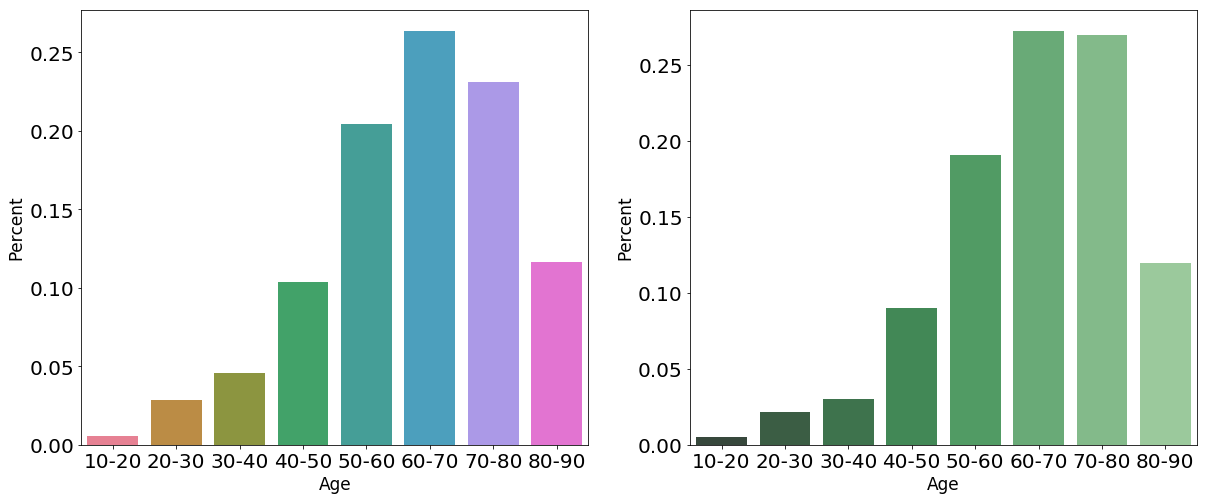

In [13]:
#========================
#display the data as percentage 
#=========================
patient_age = newDf[["age","y"]].copy()
patient_age.age = np.int_(patient_age.age)
patient_age.age = patient_age.age.apply(lambda x: ageRange(x))
patient_age = patient_age.sort_values("age")
#=============
df2 = pd.DataFrame(patient_age.age.value_counts())
df2.reset_index(level=0, inplace=True)
df2.columns = ["age","count"]
df2["percent"] = df2["count"]/df2["count"].sum(0)
df2.sort_values("age",inplace=True)
fig = plt.figure(figsize = (20,8))
ax1 = fig.add_subplot(121)
ax1 = sns.barplot(x="age",y="percent",data = df2,palette="husl")
plt.xlabel("Age",fontsize = 17), 
plt.ylabel("Percent", fontsize = 17)
plt.tick_params(axis='both', which='major', labelsize=20)
#=========
df2 = pd.DataFrame(patient_age.loc[patient_age["y"] == True].age.value_counts())
df2.reset_index(level=0, inplace=True)
df2.columns = ["age","count"]
df2["percent"] = df2["count"]/df2["count"].sum(0)
df2.sort_values("age",inplace=True)
ax3 = fig.add_subplot(122)
ax3 = sns.barplot(x="age",y="percent",data = df2,palette="Greens_d")
plt.xlabel("Age",fontsize = 17), 
plt.ylabel("Percent", fontsize = 17)
plt.tick_params(axis='both', which='major', labelsize=20)
#==================


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 30)

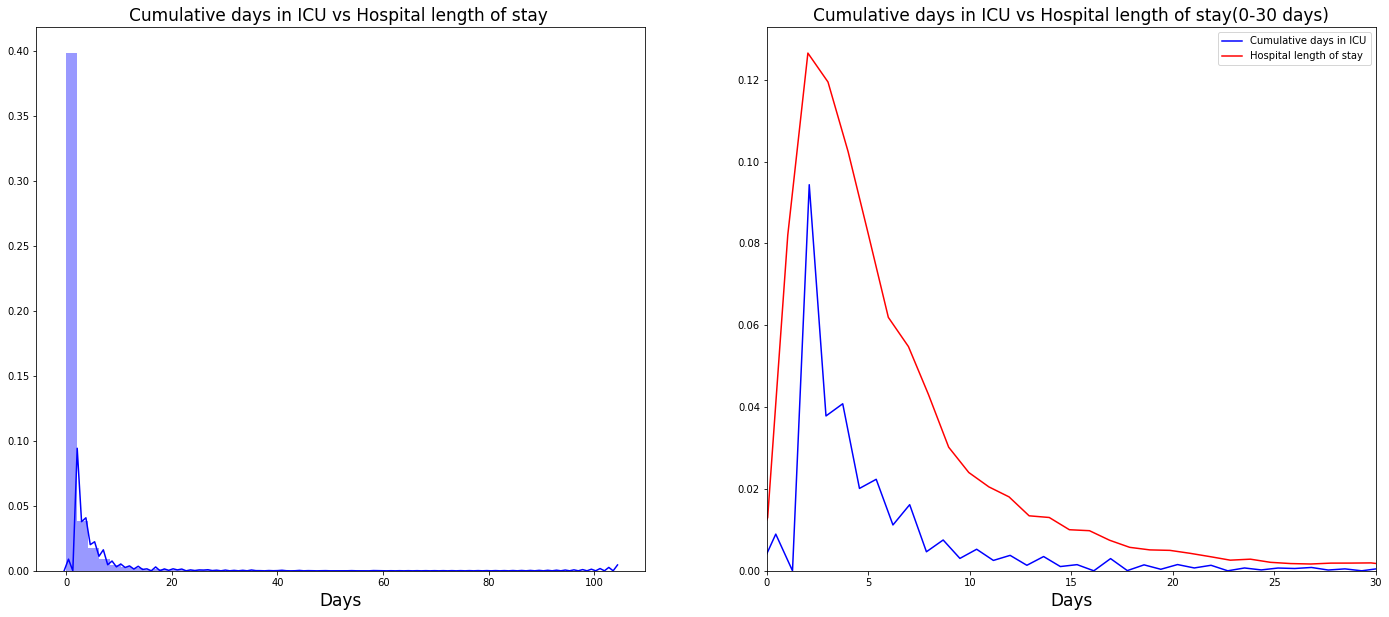

In [14]:
#cumulative days in an ICU during admission
icu_days = newDf[["ICU_Pt_Days","LOS"]].copy()
fig = plt.figure(figsize = (24,10))
ax1 = fig.add_subplot(121)
ax1 = sns.distplot(icu_days["ICU_Pt_Days"],hist=True,color="b", label = "Cumulative days in ICU")
# ax1 = sns.distplot(icu_days["LOS"],hist=False,color="red", label = "Hospital length of stay")
# ax1 = sns.countplot(icu_days["ICU_Pt_Days"],data = icu_days,palette="husl")
plt.title("Cumulative days in ICU vs Hospital length of stay ", fontsize = 17)
plt.xlabel("Days",fontsize = 17), 

ax1 = fig.add_subplot(122)
ax1 = sns.distplot(icu_days["ICU_Pt_Days"],hist=False,color="b", label = "Cumulative days in ICU")
ax1 = sns.distplot(icu_days["LOS"],hist=False,color="r", label = "Hospital length of stay")
# ax1 = sns.countplot(icu_days_sorted["ICU_Pt_Days"],data = icu_days_sorted,palette="husl")
plt.title("Cumulative days in ICU vs Hospital length of stay(0-30 days)", fontsize = 17)
plt.xlabel("Days",fontsize = 17), 
plt.xlim(0,30)



In [15]:
def combo_ECG():
    plt.close()
    userId1 = input("enter the id of a sick patient: ")
    userId2 = input("enter the id of a healthy patient: ")
    data1 = patient[patient["id"] == int(userId1)]
    data2 =  patient[patient["id"] == int(userId2)]
    num = patient[(patient["id"] == int(userId1))].index[0]
    num2 = patient[(patient["id"] == int(userId1)) & (patient["y"] == True)].index[0]
    diff = num2 - num
    n = len(data1)
    n2 =n - diff-1
    m = len(data2) 
    interval = np.arange(0,15*n/60,15/60)
    fig = plt.figure(figsize=(24,10))
    ax = fig.add_subplot(411)
    ax = plt.plot(interval,data1.hr,label="sick patient")
    plt.xticks(np.arange(0, 15*n/60,2))
    plt.xlabel("Hour",fontsize =16)
    plt.ylabel("Heart Rate",fontsize =16)
    plt.title("Mean Heart Rate for every 15 mins",fontsize =18)
    interval2 = np.arange(0,15*m/60,15/60)
    ax = plt.plot(interval2,data2.hr, label="health patient")
    plt.axvline(x=15*n2/60, color='red', linestyle='--')
    plt.legend()
    ax2 = fig.add_subplot(412)
    ax2 = plt.plot(interval,data1["s2.hr"], label = "sick patient")
    plt.tight_layout(pad=1.8)
    plt.xticks(np.arange(0, 15*n/60,2))
    plt.xlabel("Hour",fontsize =16)
    plt.ylabel("Heart Rate",fontsize =16)
    plt.title("Slope of the mean heart rate over the preceding 2 hours",fontsize =18)
    ax2 = plt.plot(interval2,data2["s2.hr"], label="healthy patient")
    plt.axvline(x=15*n2/60, color='red', linestyle='--')
    plt.legend()
    ax3 = fig.add_subplot(413)
    ax3 = plt.plot(interval,data1["s8.hr"],label = "sick patient")
    plt.tight_layout(pad=1.8)
    plt.xticks(np.arange(0, 15*n/60,2))
    plt.xlabel("Hour",fontsize =16)
    plt.ylabel("Heart Rate",fontsize =16)
    plt.title("Slope of the mean heart rate over the preceding 8 hours",fontsize =18)
    ax3 = plt.plot(interval2,data2["s8.hr"],label = "healthy patient")
    plt.axvline(x=15*n2/60, color='red', linestyle='--')
    plt.legend()
    ax4 = fig.add_subplot(414)
    ax4 = plt.plot(interval,data1["s24.hr"],label = "sick patient")
    plt.tight_layout(pad=1.8)
    plt.xticks(np.arange(0, 15*n/60,2))
    plt.xlabel("Hour",fontsize =16)
    plt.ylabel("Heart Rate",fontsize =16)
    plt.title("Slope of the mean heart rate over the preceding 24 hours",fontsize =18)
    ax4 = plt.plot(interval2,data2["s24.hr"],label = "healthy patient")
    plt.axvline(x=15*n2/60, color='red', linestyle='--')
    plt.legend()
    

In [ ]:
pId = []
indexArry = []
for i in dfTrue.id:
    data1 = patient[patient["id"] == i]
    num = patient[(patient["id"] == i)].index[0]
    num2 = patient[(patient["id"] == i) & (patient["y"] == True)].index[0]
    diff = num2 - num
    if diff >=16:
        pId.append(i)
        indexArry.append(num2)


In [ ]:

new_arry = indexArry.copy()
arry2 = []
for z in range(1,15):
    new = list(map(lambda x: x - z, new_arry))
    arry2= arry2 + new 
arry2 = arry2 + new_arry
arry2 = sorted(arry2)
    



In [ ]:
ind = [arry2[x:x+15] for x in range(0, len(arry2),15)]
a = np.zeros([15,4])
for t in ind:
    a = np.array(patient[["hr","s2.hr","s8.hr","s24.hr"]].iloc[t]) +a
    
avg = a/214



In [ ]:
new_df = pd.DataFrame(avg, columns=["hr","s2.hr","s8.hr","s24.hr"])



In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(221)
ax = plt.plot(np.arange(0,15*15,15),new_df["hr"],label="hr")
plt.title("Average hr of the previous 225 mins before transferred to ICU(214 patients)")
plt.ylim(60,100)
plt.ylabel("hr")
plt.xlabel("mins")
plt.legend()
ax1 = fig.add_subplot(222)
ax1 = plt.plot(np.arange(0,15*15,15),new_df["s2.hr"], label="s2.hr")
plt.title("Average s2.hr of the previous 225 mins before transferred to ICU(214 patients)")
plt.ylabel("s2.hr")
plt.xlabel("mins")
plt.legend()
ax2 = fig.add_subplot(223)
ax2 = plt.plot(np.arange(0,15*15,15),new_df["s8.hr"], label ="s8.hr")
plt.title("Average s8.hr of the previous 225 mins before transferred to ICU(214 patients)")
plt.ylabel("s8.hr")
plt.xlabel("mins")
plt.legend()
ax3 = fig.add_subplot(224)
ax3 = plt.plot(np.arange(0,15*15,15),new_df["s24.hr"], label = "s24.hr")
plt.title("Average s24.hr of the previous 225 mins before transferred to ICU(214 patients)")
plt.ylabel("s24.hr")
plt.xlabel("mins")
plt.legend()

In [ ]:
ind = [arry2[x:x+15] for x in range(0, len(arry2),15)]
empty_arry = np.zeros([15,4])
for t in ind:
    empty_arry = empty_arry+np.array(patient[["edrk","s2.edrk","s8.edrk","s24.edrk"]].iloc[t]) 
    
avg = empty_arry/214.0
new_df = pd.DataFrame(avg, columns=["edrk","s2.edrk","s8.edrk","s24.edrk"])
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(221)
ax = plt.plot(np.arange(0,15*15,15),new_df["edrk"],label="edrk")
plt.title("Average edrk(mean ECG derived respiratory) of the previous 225 mins before transferred to ICU(214 patients)")
plt.ylabel("edrk")
plt.xlabel("mins")
plt.legend()
ax1 = fig.add_subplot(222)
ax1 = plt.plot(np.arange(0,15*15,15),new_df["s2.edrk"], label="s2.edrk")
plt.title("Average s2.edrk of the previous 225 mins before transferred to ICU(214 patients)")
plt.ylabel("s2.edrk")
plt.xlabel("mins")
plt.legend()
ax2 = fig.add_subplot(223)
ax2 = plt.plot(np.arange(0,15*15,15),new_df["s8.edrk"], label ="s8.edrk")
plt.title("Average s8.edrk of the previous 225 mins before transferred to ICU(214 patients)")
plt.ylabel("s8.edrk")
plt.xlabel("mins")
plt.legend()
ax3 = fig.add_subplot(224)
ax3 = plt.plot(np.arange(0,15*15,15),new_df["s24.edrk"], label = "s24.edrk")
plt.title("Average s24.edrk of the previous 225 mins before transferred to ICU(214 patients)")
plt.ylabel("s24.edrk")
plt.xlabel("mins")
plt.legend()


In [ ]:
ind = [arry2[x:x+15] for x in range(0, len(arry2),15)]
empty_arry = np.zeros([15,2])
for t in ind:
    empty_arry = empty_arry+np.array(patient[["WHITE.BLOOD.CELL.COUNT","Temp"]].iloc[t]) 
avg = empty_arry/214.0
new_df = pd.DataFrame(avg, columns=["WHITE.BLOOD.CELL.COUNT","Temp"])
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(221)
ax = plt.plot(np.arange(0,15*15,15),new_df["WHITE.BLOOD.CELL.COUNT"],label="WHITE.BLOOD.CELL.COUNT")
plt.title("Average WHITE.BLOOD.CELL.COUNT of the previous 225 mins before transferred to ICU(214 patients)")
plt.ylabel("WHITE.BLOOD.CELL.COUNT")
plt.xlabel("mins")
plt.legend()
ax1 = fig.add_subplot(222)
ax1 = plt.plot(np.arange(0,15*15,15),new_df["Temp"], label="Temp")
plt.title("Average Temperature of the previous 225 mins before transferred to ICU(214 patients)")
plt.ylabel("Temp")
plt.xlabel("mins")
plt.legend()


In [ ]:
ind = [arry2[x:x+15] for x in range(0, len(arry2),15)]
empty_arry = np.zeros([15,2])
for t in ind:
    empty_arry = empty_arry+np.array(patient[["cosen","lds"]].iloc[t]) 
avg = empty_arry/214.0
new_df = pd.DataFrame(avg, columns=["cosen","lds"])
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(211)
ax = plt.plot(np.arange(0,15*15,15),new_df["cosen"],label="cosen")
plt.title("Average coefficient of sample entropy of the previous 225 mins before transferred to ICU(214 patients)",fontsize = 17)
plt.ylabel("cosen")
plt.xlabel("mins")
plt.legend()
ax1 = fig.add_subplot(212)
ax1 = plt.plot(np.arange(0,15*15,15),new_df["lds"], label="lds")
plt.title("Average lds(local dynamics score) of the previous 225 mins before transferred to ICU(214 patients)",fontsize = 17)
plt.ylabel("lds")
plt.xlabel("mins")
plt.legend()


In [ ]:
patient.iloc[: , 15:70].var()[patient.iloc[: , 15:70].var()>5].plot(kind = "barh")



In [ ]:
ind = [arry2[x:x+15] for x in range(0, len(arry2),15)]
empty_arry = np.zeros([15,2])
for t in ind:
    empty_arry = empty_arry+np.array(patient[["PLATELET.COUNT","GLUCOSE"]].iloc[t]) 
avg = empty_arry/214.0
new_df = pd.DataFrame(avg, columns=["PLATELET.COUNT","GLUCOSE"])
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(211)
ax = plt.plot(np.arange(0,15*15,15),new_df["PLATELET.COUNT"],label="PLATELET.COUNT")
plt.title("Average PLATELET.COUNT of the previous 225 mins before transferred to ICU(214 patients)",fontsize = 17)
plt.ylabel("PLATELET.COUNT")
plt.xlabel("mins")
plt.legend()
ax1 = fig.add_subplot(212)
ax1 = plt.plot(np.arange(0,15*15,15),new_df["GLUCOSE"], label="GLUCOSE")
plt.title("Average GLUCOSE of the previous 225 mins before transferred to ICU(214 patients)",fontsize = 17)
plt.ylabel("GLUCOSE")
plt.xlabel("mins")
plt.legend()


In [ ]:
pId2 = []
indexArry2 = []
for i in dfFalse.id:
    data1 = patient[patient["id"] == i]
    num = patient[(patient["id"] == i)].index[0]
    num2 = patient[(patient["id"] == i) & (patient["y"] == False)].index
    diff = num2 - num
    if len(num2) >=17:
        pId2.append(i)
        indexArry2.append(num2[16])

new_arry = indexArry2.copy()
arry3 = []
for z in range(1,15):
    new = list(map(lambda x: x - z, new_arry))
    arry3= arry3 + new 
arry3 = arry3 + new_arry
arry3 = sorted(arry3)


In [ ]:
ind = [arry3[x:x+15] for x in range(0, len(arry3),15)]
empty_arry = np.zeros([15,2])
for t in ind:
    empty_arry = empty_arry+np.array(patient[["PLATELET.COUNT","GLUCOSE"]].iloc[t]) 
avg = empty_arry/7341.0
new_df = pd.DataFrame(avg, columns=["PLATELET.COUNT","GLUCOSE"])
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(211)
ax = plt.plot(np.arange(0,15*15,15),new_df["PLATELET.COUNT"],label="PLATELET.COUNT")
plt.title("Average PLATELET.COUNT of 225 mins(7341 patients)",fontsize = 17)
plt.ylabel("PLATELET.COUNT")
plt.xlabel("mins")
plt.legend()
ax1 = fig.add_subplot(212)
ax1 = plt.plot(np.arange(0,15*15,15),new_df["GLUCOSE"], label="GLUCOSE")
plt.title("Average GLUCOSE of 225 mins(7341 patients)",fontsize = 17)
plt.ylabel("GLUCOSE")
plt.xlabel("mins")
plt.legend()


In [ ]:
#get the max number of records in patients with events
numOfRec = []
for i in dfTrue.id:
    end = patient[(patient["id"] == i)].index[0]
    start = patient[(patient["id"] == i) & (patient["y"] == True)].index[0]
    diff = start-end
    numOfRec.append(diff)
maxNum = max(numOfRec)+1


In [ ]:
#initalize an empty list
idList = []
dfArray = np.zeros([maxNum,1])
indList2 = []
#select hr for all patients with events
for i in dfTrue.id:
    data1 = patient[patient["id"] == i]
    end = patient[(patient["id"] == i)].index[0]
    start = patient[(patient["id"] == i) & (patient["y"] == True)].index[0]
    idList.append(i)
    dfMatrix = np.array(patient.hr.iloc[end:start+1].iloc[::-1])
    if dfMatrix.shape[0]< maxNum:
        dfMatrix = np.append(dfMatrix,np.repeat(np.nan, maxNum-dfMatrix.shape[0]))
    hrMatrix = np.array(dfMatrix).reshape(-1,1)
    dfArray = np.append(dfArray,hrMatrix,1)

dfArray2 = dfArray.copy()
dfArray2 = np.delete(dfArray2,0,1)
dfArray3 = dfArray2[::-1]
avgHr = np.nanmean(dfArray3,1)

# arry2 = []
# for z in range(1,15):
#     new = list(map(lambda x: x - z, new_arry))
#     arry2= arry2 + new 
# arry2 = arry2 + new_arry
# arry2 = sorted(arry2)
# ind = [arry2[x:x+15] for x in range(0, len(arry2),15)]
# a = np.zeros([15,4])
# for t in ind:
#     a = np.array(patient[["hr","s2.hr","s8.hr","s24.hr"]].iloc[t]) +a
    
# avg = a/214


In [ ]:
new_df = pd.DataFrame(avgHr, columns=["Hr"])
new_std = pd.DataFrame(np.nanstd(dfArray3,1), columns=["var"])
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(211)
ax = plt.plot(np.arange(-3228*15/60,0,15/60),new_df["Hr"],label="Heart Rate")
ax = plt.plot(np.arange(-3228*15/60,0,15/60),new_std["var"],color="green",label="standard deviation")
plt.title("Average heart rate",fontsize = 17)
plt.ylabel("Heart Rate")
plt.xlabel("Hours")
plt.legend()
numOfPatient = pd.DataFrame(dfArray3)
new_num = pd.DataFrame(numOfPatient.notnull().sum(1),columns=["number_of_Patients"])
ax1 = fig.add_subplot(212)
ax1 = plt.plot(np.arange(-3228*15/60,0,15/60),new_num["number_of_Patients"],color="red",label="Heart Rate")
plt.title("The number of patients vs time to event",fontsize = 17)
plt.ylabel("Number of Patients")
plt.xlabel("Hours")
plt.legend()

In [ ]:
# new_df = patient.drop(['id', 'age', 'race', 'svc', 'LOS', 'ICU_Pt_Days', 'Mort', 'n_evts',
#        'eid', 'y', 'tte', 'death', 'direct', 'MET', 'Sgy'],axis=1)

In [ ]:
# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(111)
# ax = sns.heatmap(new_df[1:50].transpose(),vmin=0, vmax=4)

In [ ]:
#get the max number of records in patients with events
numOfRec2 = []
for i in dfTrue.id:
    end = patient[(patient["id"] == i)].index[-1]
    start = patient[(patient["id"] == i) & (patient["y"] == True)].index[0]
    diff = end-start
    numOfRec2.append(diff)
maxNums1 = max(numOfRec2)

In [ ]:
new_dfArray = np.zeros([maxNums1,1])
new_indList2 = []
#select hr for all patients with events
for i in dfTrue.id:
    data1 = patient[patient["id"] == i]
    end = patient[(patient["id"] == i)].index[-1]
    start = patient[(patient["id"] == i) & (patient["y"] == True)].index[0]
    dfMatrix = np.array(patient.hr.iloc[start+1:end+1])
    if dfMatrix.shape[0]< maxNums1:
        dfMatrix = np.append(dfMatrix,np.repeat(np.nan, maxNums1-dfMatrix.shape[0]))
    hrMatrix = np.array(dfMatrix).reshape(-1,1)
    new_dfArray = np.append(new_dfArray,hrMatrix,1)

dfArray4 = new_dfArray.copy()
dfArray4 = np.delete(dfArray4,0,1)
new_hr = np.concatenate((dfArray3,dfArray4), 0)
new_hr.shape

# avgHr2 = np.nanmean(dfArray3,1)
# total_hr = np.concatenate(avgHr)

In [ ]:
total_avgHr = np.nanmean(new_hr,1)
new_df = pd.DataFrame(total_avgHr, columns=["Hr"])
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(211)
ax = plt.plot(np.arange(-3228*15/(60*24),5232*15/(60*24),15/(60*24)),new_df["Hr"],label="Heart Rate")
plt.title("Average heart rate",fontsize = 17)
plt.ylabel("Heart Rate")
plt.xlabel("days")
plt.xticks(np.arange(-34, 56, 2))
plt.legend()
numOfPatient = pd.DataFrame(new_hr)
new_num = pd.DataFrame(numOfPatient.notnull().sum(1),columns=["number_of_Patients"])
ax1 = fig.add_subplot(212)
ax1 = plt.plot(np.arange(-3228*15/(60*24),5232*15/(60*24),15/(60*24)),new_num["number_of_Patients"],color="red",label="The number_of_Patients")
plt.title("The number of patients vs time to event",fontsize = 17)
plt.ylabel("The Number of Patients")
plt.xlabel("Hours")
plt.legend()

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(211)
ax = plt.plot(np.arange(-3228*15/(60*24),5232*15/(60*24),15/(60*24)),new_df["Hr"],label="Heart Rate")
plt.title("Average heart rate",fontsize = 17)
plt.ylabel("Heart Rate")
plt.xlabel("days")
plt.xticks(np.arange(-34, 56, 2))
plt.xlim(-2,2)
plt.legend()

In [ ]:
#get the max number of records in patients with events
numOfRec = []
for i in dfTrue.id:
    end = patient[(patient["id"] == i)].index[0]
    start = patient[(patient["id"] == i) & (patient["y"] == True)].index[0]
    diff = start-end
    numOfRec.append(diff)
maxNum = max(numOfRec)+1
idList = []
dfArray = np.zeros([maxNum,1])
indList2 = []
#select hr for all patients with events
for i in dfTrue.id:
    end = patient[(patient["id"] == i)].index[0]
    start = patient[(patient["id"] == i) & (patient["y"] == True)].index[0]
    idList.append(i)
    dfMatrix = np.array(patient["n.edrk"].iloc[end:start+1].iloc[::-1])
    if dfMatrix.shape[0]< maxNum:
        dfMatrix = np.append(dfMatrix,np.repeat(np.nan, maxNum-dfMatrix.shape[0]))
    hrMatrix = np.array(dfMatrix).reshape(-1,1)
    dfArray = np.append(dfArray,hrMatrix,1)

dfArray2 = dfArray.copy()
dfArray2 = np.delete(dfArray2,0,1)
dfArray3 = dfArray2[::-1]
avgHr = np.nanmean(dfArray3,1)
new_df = pd.DataFrame(avgHr, columns=["Hr"])
new_std = pd.DataFrame(np.nanstd(dfArray3,1), columns=["var"])
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(211)
ax = plt.plot(np.arange(-3228*15/60,0,15/60),new_df["Hr"],label="N.edrk")
ax = plt.plot(np.arange(-3228*15/60,0,15/60),new_std["var"],color="green",label="standard deviation")
plt.title("Average percent of measurements made for ECG derived respiration (EDR)",fontsize = 17)
plt.ylabel("N.edrk")
plt.xlabel("Hours")
plt.legend()
numOfPatient = pd.DataFrame(dfArray3)
new_num = pd.DataFrame(numOfPatient.notnull().sum(1),columns=["number_of_Patients"])
ax1 = fig.add_subplot(212)
ax1 = plt.plot(np.arange(-3228*15/60,0,15/60),new_num["number_of_Patients"],color="red",label="Heart Rate")
plt.title("The number of patients vs time to event",fontsize = 17)
plt.ylabel("Number of Patients")
plt.xlabel("Hours")
plt.legend()

In [ ]:
combo_ECG()

In [16]:
def combo_ECG():
    plt.close()
    userId1 = input("enter the id of a sick patient: ")
    userId2 = input("enter the id of a healthy patient: ")
    data1 = patient[patient["id"] == int(userId1)]
    data2 =  patient[patient["id"] == int(userId2)]
    num = patient[(patient["id"] == int(userId1))].index[0]
    num2 = patient[(patient["id"] == int(userId1)) & (patient["y"] == True)].index[0]
    diff = num2 - num
    n = len(data1)
    n2 =n - diff-1
    m = len(data2) 
    interval = np.arange(0,15*n/60,15/60)
    fig = plt.figure(figsize=(14,10))
    ax = fig.add_subplot(211)
    ax = plt.plot(interval,data1.hr,label="patients deteriorate")
    plt.xticks(np.arange(0, 15*n/60,2))
    plt.xlabel("Hour",fontsize =16)
    plt.ylabel("Heart Rate",fontsize =16)
    interval2 = np.arange(0,15*m/60,15/60)
    ax = plt.plot(interval2,data2.hr, label="patients not deteriorate")
    plt.axvline(x=15*n2/60, color='red', linestyle='--')
    plt.legend(fontsize=15)
    ax2 = fig.add_subplot(212)
    ax2 = plt.plot(interval,data1["edrk"], label = "patients deteriorate")
    plt.tight_layout(pad=1.8)
    plt.xticks(np.arange(0, 15*n/60,2))
    plt.xlabel("Hour",fontsize =16)
    plt.ylabel("Respiratory rate",fontsize =16)
    ax2 = plt.plot(interval2,data2["edrk"], label="patients not deteriorate")
    plt.axvline(x=15*n2/60, color='red', linestyle='--')
    plt.legend(fontsize=15)
    

enter the id of a sick patient: 806
enter the id of a healthy patient: 7


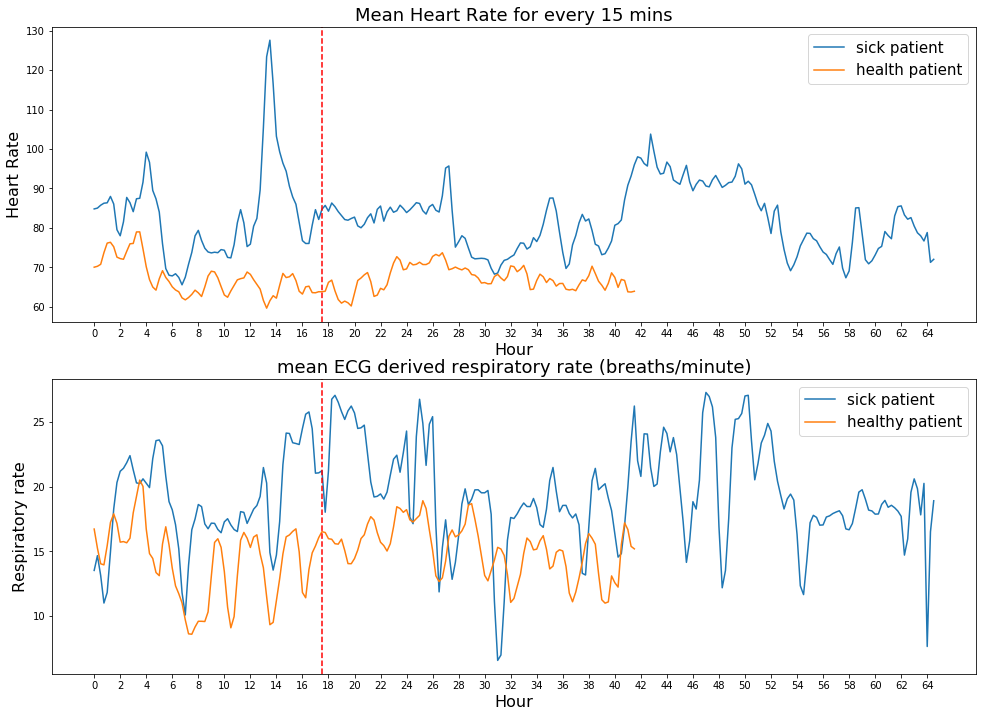

In [192]:
combo_ECG()

In [17]:
patient.SBP.loc[patient.SBP ==0] = patient.SBP.mean()

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [18]:
patient["shockInd"] = patient.hr/patient.SBP

In [19]:
shock = patient.copy()
shock.age = shock.age.apply(ageRange)
SI_sick = shock[shock.y == True]
SI_healthy = shock[shock.y == False]
shock_index_healthy = SI_healthy.groupby("age")["shockInd"].mean()
shock_index_sick = SI_sick.groupby("age")["shockInd"].mean()

In [20]:
shock_index_healthy2 = pd.DataFrame(shock_index_healthy,index=None)
shock_index_healthy2.reset_index(level=0, inplace=True)
shock_index_sick2 = pd.DataFrame(shock_index_sick,index=None)
shock_index_sick2.reset_index(level=0, inplace=True)

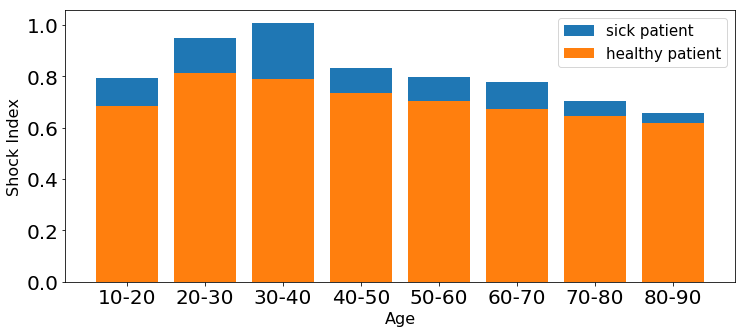

In [21]:
fig = plt.figure(figsize=(12,5))
plt.bar(shock_index_sick2["age"],shock_index_sick2["shockInd"],label="sick patient")
plt.bar(shock_index_healthy2["age"],shock_index_healthy2["shockInd"], label = "healthy patient")
plt.legend(fontsize=15)
plt.xlabel("Age",fontsize=16)
plt.ylabel("Shock Index",fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=20)

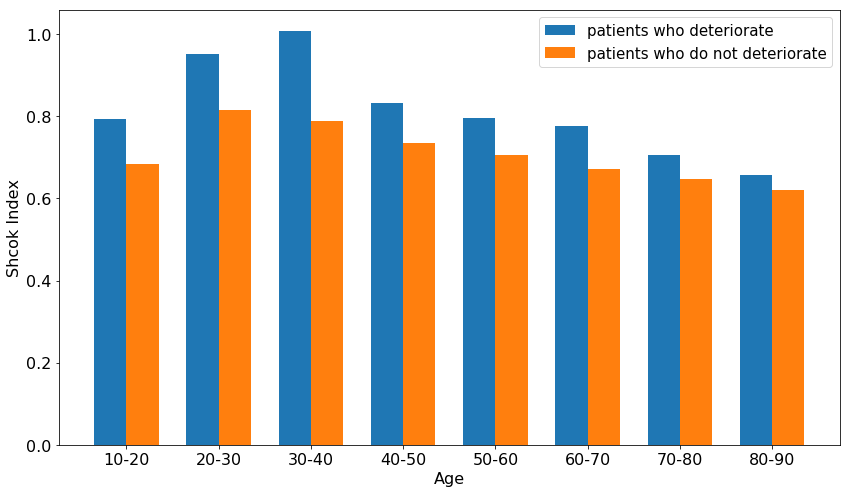

In [22]:
n_groups = 8
plot_index = np.arange(n_groups)
bar_width = 0.35
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
rects1 = ax.bar(plot_index, shock_index_sick2["shockInd"], bar_width,label='patients who deteriorate')
rects2 = ax.bar(plot_index + bar_width, shock_index_healthy2["shockInd"], bar_width,label='patients who do not deteriorate')
ax.set_xlabel('Age',fontsize=16)
ax.set_ylabel('Shcok Index',fontsize=16)
ax.set_xticks(plot_index + bar_width / 2)
ax.set_xticklabels(('10-20', '20-30', '30-40', '40-50', '50-60','60-70','70-80','80-90'),fontsize=16)
ax.set_yticklabels((0.0,0.2,0.4,0.6,0.8,1.0),fontsize=16)
ax.legend(fontsize=15)

Text(0.5,0,'Hours between new oberservations')

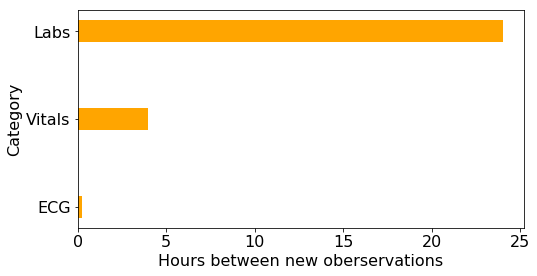

In [27]:
fig = plt.figure(figsize=(8,4))
new_dict = [0.25,4,24]
obs = ["ECG","Vitals","Labs"]
plt.barh(obs,new_dict,0.25,color="orange")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel("Category",fontsize=16)
plt.xlabel("Hours between new oberservations",fontsize=16)

In [ ]:
from sklearn.manifold import TSNE
new_data = patient.drop(["y","eid","tte","death","direct","MET","Sgy","race","svc","LOS","ICU_Pt_Days","Mort","n_evts"], axis = 1)
X_embedded = TSNE(n_components=2).fit_transform(new_data)
X_embedded.shape
